## References:

https://www.youtube.com/watch?v=V86gTgL1FRw

https://www.youtube.com/watch?v=7NW4EouQDes

https://www.youtube.com/watch?v=z_BXANUOjJY

## Documentation:
https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset=sm.datasets.spector.load_pandas()
dataset.data.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


In [ ]:
dataset.data.describe()

,GPA,TUCE,PSI,GRADE
count,32.000000,32.000000,32.000000,32.000000
mean,3.117188,21.937500,0.437500,0.343750
std,0.466713,3.901509,0.504016,0.482559
min,2.060000,12.000000,0.000000,0.000000
25%,2.812500,19.750000,0.000000,0.000000
50%,3.065000,22.500000,0.000000,0.000000
75%,3.515000,25.000000,1.000000,1.000000
max,4.000000,29.000000,1.000000,1.000000


In [ ]:
dataset.data.isna().sum()

GPA      0
TUCE     0
PSI      0
GRADE    0
dtype: int64

In [ ]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GPA     32 non-null     float64
 1   TUCE    32 non-null     float64
 2   PSI     32 non-null     float64
 3   GRADE   32 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [ ]:
model = sm.OLS.from_formula('GRADE ~ GPA + TUCE', dataset.data) #Ordinary Least Squares Regression  Grade as a function of GPA and TUCE

#Note: Using sm.OLS(y,x).fit()   -> y is first, not x, unlike sklearn where x is first in model.fit(x,y)

In [ ]:
results=model.fit()

In [ ]:
results.conf_int(alpha=0.1, cols=None)

,0,1
Intercept,-2.432282,-0.466498
GPA,0.157919,0.765975
TUCE,-0.020270,0.052468


In [ ]:
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.136
Date:                Thu, 21 Oct 2021   Prob (F-statistic):             0.0123
Time:                        10:30:22   Log-Likelihood:                -16.730
No. Observations:                  32   AIC:                             39.46
Df Residuals:                      29   BIC:                             43.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
Intercept     -1.4494      0.578     -2.506      0.0

In [ ]:
model.predict(results.params, [[1, 4.0, 25]]) # Intercept, GPA, TUCE

array([0.8008647])

In [ ]:
preds=model.predict(results.params, pd.merge( pd.DataFrame( np.ones(len(dataset.data) )) , dataset.data[['GPA','TUCE']] ,left_index=True,right_index=True) )

In [ ]:
pd.DataFrame( np.ones(len(dataset.data) ))

In [ ]:
preds

array([ 0.10136247,  0.23980759,  0.45216423,  0.09267935,  0.73647004,
        0.14545586,  0.09926117,  0.21446999,  0.35277616,  0.82830361,
        0.08750406,  0.45454345,  0.57003018,  0.45902396,  0.5998483 ,
        0.12221956,  0.22343102,  0.16379478,  0.36215406,  0.41282927,
       -0.14360837,  0.67362086,  0.11101827,  0.59060936,  0.57227044,
        0.2925841 ,  0.39028774,  0.1703766 ,  0.57478861,  0.76866737,
        0.32071779, -0.03946187])

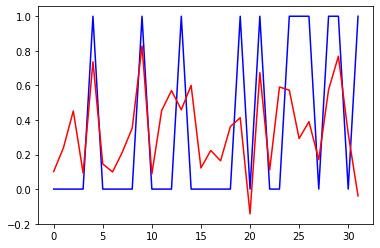

In [ ]:
plt.plot(dataset.data['GRADE'],'b')
plt.plot(preds,'r')
plt.show()

In [ ]:
print(results.f_test("GPA = TUCE = 0")) # F Test of GPA and Truce being 0
print(results.f_test("GPA = 0")) # F test of GPA being 0

<F test: F=array([[5.13598155]]), p=0.0123189334795685, df_denom=29, df_num=2>
<F test: F=array([[6.66512585]]), p=0.015152091770702656, df_denom=29, df_num=1>


In [ ]:
model2 = sm.OLS.from_formula('GRADE ~ GPA + TUCE + PSI', dataset.data)

In [ ]:
res2 = model2.fit()
print(res2.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 21 Oct 2021   Prob (F-statistic):            0.00157
Time:                        10:39:02   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
Intercept     -1.4980      0.524     -2.859      0.0

In [ ]:
print('p-value is the middle term:')
res2.compare_f_test(results)  #Probablitiy that results was better than res2

p-value is the middle term:


(7.398592827766216, 0.011087680712559986, 1.0)

In [ ]:
res2.save('OLS Results.pkl') #Pickle file

In [ ]:
res = sm.load('OLS Results.pkl')

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 21 Oct 2021   Prob (F-statistic):            0.00157
Time:                        10:41:17   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4980      0.524     -2.859      0.0